In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import os

for dirname, _, filenames in os.walk('測試資料/'):
    for i, filename in enumerate(filenames):
            print(os.path.join(dirname,filename))

測試資料/07_11_2017-sms-biige-alibaba-5deb5969dd67e5021bafa07c6ccc1330.pcap_ISCX.csv
測試資料/07_11_2017-sms-biige-alibaba-6c9bcb2482132974f4d6e5e0061df4c0.pcap_ISCX.csv
測試資料/07_11_2017-sms-fakenotify-F-secure-0b5697a9975bc9e978fc96a0333443c8.pcap_ISCX.csv
測試資料/07_11_2017-sms-plankton-ikarus-04b2c5d39ba3f3c65a22b7ea0bcfa36a.pcap_ISCX.csv
測試資料/07_11_2017-sms-plankton-ikarus-0709f23a82b4110d7333a5bdd81e799a.pcap_ISCX.csv
測試資料/07_11_2017-sms-plankton-ikarus-09bd989ecbad4964eab2258b1455c7b4.pcap_ISCX.csv
測試資料/07_11_2017-sms-plankton-ikarus-0a92c1b67f2cd4d49e8d878f313bc2c3.pcap_ISCX.csv
測試資料/07_12_2017-sms-biige-alibaba-8e1a4187f9a211b0c28b7dbe5fa6deec.pcap_ISCX.csv
測試資料/07_12_2017-sms-fakenotify-F-secure-2acd800a5c95d73c493ed148748a643a.pcap_ISCX.csv
測試資料/07_12_2017-sms-fakenotify-F-secure-2d84afd761b473eff0069e9e0de97e16.pcap_ISCX.csv
測試資料/07_13_2017-sms-fakeinst-bkav-2b3db5c3d5c519fc77da7b3ccb25b9c2.pcap_ISCX.csv
測試資料/07_13_2017-sms-fakenotify-F-secure-3e4f620b98908090340dab1b790c4bfe.pcap_ISCX.

In [2]:
category = ['flow1_v1','flow2_v1','nandrobox','fakenotify','biige','fakeinst','plankton','cleanState']

In [3]:
flow1_v1 = pd.read_csv('flow1_v1.csv',header = None)
flow1_v1.insert(77,column="label",value=0)
flow1_v1.shape

(2502, 78)

In [4]:
flow1_v2 = pd.read_csv('flow2_v1.csv',header = None)
flow1_v2.insert(77,column="label",value=1)
flow1_v2.shape

(2727, 78)

In [5]:
nandrobox1 = pd.read_csv('測試資料/07_17_2017-sms-nandrobox-Nano-antivirus-1331ae4b33daabf7ac0462cf03babf6a.pcap_ISCX.csv')
nandrobox2 = pd.read_csv('測試資料/07_17_2017-sms-nandrobox-Nano-antivirus-14a457989137585d27e4942c3ef1e0c4.pcap_ISCX.csv')
nandrobox3 = pd.read_csv('測試資料/07_14_2017-sms-nandrobox-Nano-antivirus-0adcc06fe300df345a48c49c66801e42.pcap_ISCX.csv')
nandrobox = nandrobox1.append(nandrobox2, ignore_index=True)
nandrobox = nandrobox.append(nandrobox3, ignore_index=True)
nandrobox = nandrobox.drop(columns=['Flow ID',' Source IP',' Source Port',' Destination IP',
                                       ' Destination Port',' Protocol',' Timestamp',' Label'])
nandrobox.insert(77,column="label",value=2)
nandrobox.shape

(9291, 78)

In [6]:
fakenotify1 = pd.read_csv('測試資料/07_12_2017-sms-fakenotify-F-secure-2d84afd761b473eff0069e9e0de97e16.pcap_ISCX.csv')
fakenotify2 = pd.read_csv('測試資料/07_13_2017-sms-fakenotify-F-secure-3e4f620b98908090340dab1b790c4bfe.pcap_ISCX.csv')
fakenotify3 = pd.read_csv('測試資料/07_12_2017-sms-fakenotify-F-secure-2acd800a5c95d73c493ed148748a643a.pcap_ISCX.csv')
fakenotify4 = pd.read_csv('測試資料/07_11_2017-sms-fakenotify-F-secure-0b5697a9975bc9e978fc96a0333443c8.pcap_ISCX.csv')
fakenotify = fakenotify1.append(fakenotify2, ignore_index=True)
fakenotify = fakenotify.append(fakenotify3, ignore_index=True)
fakenotify = fakenotify.append(fakenotify4, ignore_index=True)
fakenotify = fakenotify.drop(columns=['Flow ID',' Source IP',' Source Port',' Destination IP',
                                       ' Destination Port',' Protocol',' Timestamp',' Label'])
fakenotify.insert(77,column="label",value=3)
fakenotify.shape

(15111, 78)

In [7]:
biige1 = pd.read_csv('測試資料/07_11_2017-sms-biige-alibaba-6c9bcb2482132974f4d6e5e0061df4c0.pcap_ISCX.csv')
biige2 = pd.read_csv('測試資料/07_12_2017-sms-biige-alibaba-8e1a4187f9a211b0c28b7dbe5fa6deec.pcap_ISCX.csv')
biige3 = pd.read_csv('測試資料/07_11_2017-sms-biige-alibaba-5deb5969dd67e5021bafa07c6ccc1330.pcap_ISCX.csv')
biige = biige1.append(biige2, ignore_index=True)
biige = biige.append(biige3, ignore_index=True)
biige = biige.drop(columns=['Flow ID',' Source IP',' Source Port',' Destination IP',
                                       ' Destination Port',' Protocol',' Timestamp',' Label'])
biige.insert(77,column="label",value=4)
biige.shape

(7316, 78)

In [8]:
fakeinst = pd.read_csv('測試資料/07_13_2017-sms-fakeinst-bkav-2b3db5c3d5c519fc77da7b3ccb25b9c2.pcap_ISCX.csv')
fakeinst = fakeinst.drop(columns=['Flow ID',' Source IP',' Source Port',' Destination IP',
                                       ' Destination Port',' Protocol',' Timestamp',' Label'])
fakeinst.insert(77,column="label",value=5)
fakeinst.shape

(3012, 78)

In [9]:
plankton1 = pd.read_csv('測試資料/07_11_2017-sms-plankton-ikarus-09bd989ecbad4964eab2258b1455c7b4.pcap_ISCX.csv')
plankton2 = pd.read_csv('測試資料/07_11_2017-sms-plankton-ikarus-0709f23a82b4110d7333a5bdd81e799a.pcap_ISCX.csv')
plankton3 = pd.read_csv('測試資料/07_11_2017-sms-plankton-ikarus-0a92c1b67f2cd4d49e8d878f313bc2c3.pcap_ISCX.csv')
plankton4 = pd.read_csv('測試資料/07_11_2017-sms-plankton-ikarus-04b2c5d39ba3f3c65a22b7ea0bcfa36a.pcap_ISCX.csv')
plankton = plankton1.append(plankton2, ignore_index=True)
plankton = plankton.append(plankton3, ignore_index=True)
plankton = plankton.append(plankton4, ignore_index=True)
plankton = plankton.drop(columns=['Flow ID',' Source IP',' Source Port',' Destination IP',
                                       ' Destination Port',' Protocol',' Timestamp',' Label'])
plankton.insert(77,column="label",value=6)
plankton.shape

(16467, 78)

In [10]:
cleanState1 = pd.read_csv('測試資料/cleanState-SMS-ph1.pcap_ISCX.csv')
cleanState = cleanState1.drop(columns=['Flow ID',' Source IP',' Source Port',' Destination IP',
                                       ' Destination Port',' Protocol',' Timestamp',' Label'])
cleanState.insert(77,column="label",value=7)
cleanState.shape

(186, 78)

In [11]:
data = cleanState.append(plankton, ignore_index=True)
data = data.append(fakeinst, ignore_index=True)
data = data.append(biige, ignore_index=True)
data = data.append(fakenotify, ignore_index=True)
data = data.append(nandrobox, ignore_index=True)
data.shape
data

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,1334574,12,6,1391.0,4224.0,885.0,0.0,115.916667,255.459464,1448.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7
1,1479,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7
2,37338,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7
3,1293103,10,8,3091.0,3994.0,1428.0,0.0,309.100000,491.975033,1448.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7
4,23437,2,0,85.0,0.0,85.0,0.0,42.500000,60.104076,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51378,31081602,6,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40,6999567.0,0.0,6999567.0,6999567.0,12041017.5,5.657579e+06,16041530.0,8040505.0,2
51379,1421,1,1,31.0,125.0,31.0,31.0,31.000000,0.000000,125.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,2
51380,610692,6,0,750.0,0.0,125.0,125.0,125.000000,0.000000,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,2
51381,775,2,0,31.0,0.0,31.0,0.0,15.500000,21.920310,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,2


In [12]:
data1 = flow1_v1.append(flow1_v2, ignore_index=True)
data1

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,label
0,250840,6,7,1079,201,537,0,179.833333,260.004167,137,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,27166,2,1,31,0,31,0,15.500000,21.920310,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,11626,2,0,85,0,85,0,42.500000,60.104076,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,16,2,0,0,0,0,0,0.000000,0.000000,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,37180,1,1,0,0,0,0,0.000000,0.000000,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,51307,1,1,37,327,37,37,37.000000,0.000000,327,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5225,1681,1,1,28,44,28,28,28.000000,0.000000,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5226,51568,1,1,34,79,34,34,34.000000,0.000000,79,...,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5227,10532248,9,5,331,3866,205,0,36.777778,75.603865,1448,...,32,256350.0,0.0,256350.0,256350.0,10300000.0,0.0,10300000.0,10300000.0,1


In [13]:
data_y = np.array(data['label']) 
data1_y = np.array(data1['label'])
data_y = np.append(data_y,data1_y)
data_y.shape

(56612,)

In [14]:
n = np.array(data1.drop(columns=['label']))
f = np.array(data.drop(columns=['label']))
data_x = np.append(f,n,axis=0) 
data_x.shape

(56612, 77)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=666)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
Y_train = to_categorical(y_train) 
Y_test = to_categorical(y_test)

In [18]:
model = Sequential()

model.add(LSTM(150,input_shape = (X_train.shape[1], 1), return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(150))
model.add(Dropout(0.5))
model.add(Dense(8, activation='sigmoid'))

model.summary()
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 77, 150)           91200     
_________________________________________________________________
dropout (Dropout)            (None, 77, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 1208      
Total params: 273,008
Trainable params: 273,008
Non-trainable params: 0
_________________________________________________________________


In [19]:
Epoch = 300
batch_size = 128

In [20]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=Epoch)

Epoch 1/300
354/354 [==============================] - 9s 21ms/step - loss: 1.7760 - accuracy: 0.2806 - val_loss: 1.7257 - val_accuracy: 0.3050
Epoch 2/300
354/354 [==============================] - 8s 22ms/step - loss: 1.7393 - accuracy: 0.2926 - val_loss: 1.7199 - val_accuracy: 0.3069
Epoch 3/300
354/354 [==============================] - 8s 22ms/step - loss: 1.7280 - accuracy: 0.3020 - val_loss: 1.6947 - val_accuracy: 0.3088
Epoch 4/300
354/354 [==============================] - 8s 22ms/step - loss: 1.7105 - accuracy: 0.3162 - val_loss: 1.6868 - val_accuracy: 0.3242
Epoch 5/300
354/354 [==============================] - 8s 22ms/step - loss: 1.6864 - accuracy: 0.3340 - val_loss: 1.6545 - val_accuracy: 0.3444
Epoch 6/300
354/354 [==============================] - 8s 22ms/step - loss: 1.6649 - accuracy: 0.3468 - val_loss: 1.6435 - val_accuracy: 0.3537
Epoch 7/300
354/354 [==============================] - 8s 22ms/step - loss: 1.6532 - accuracy: 0.3550 - val_loss: 1.6348 - val_accuracy:

354/354 [==============================] - 4s 13ms/step - loss: 1.2325 - accuracy: 0.5120 - val_loss: 1.4683 - val_accuracy: 0.4532
Epoch 114/300
354/354 [==============================] - 4s 12ms/step - loss: 1.2318 - accuracy: 0.5166 - val_loss: 1.4501 - val_accuracy: 0.4560
Epoch 115/300
354/354 [==============================] - 4s 12ms/step - loss: 1.2296 - accuracy: 0.5107 - val_loss: 1.4629 - val_accuracy: 0.4569
Epoch 116/300
354/354 [==============================] - 4s 12ms/step - loss: 1.2236 - accuracy: 0.5127 - val_loss: 1.4691 - val_accuracy: 0.4567
Epoch 117/300
354/354 [==============================] - 4s 12ms/step - loss: 1.2172 - accuracy: 0.5187 - val_loss: 1.4588 - val_accuracy: 0.4600
Epoch 118/300
354/354 [==============================] - 4s 12ms/step - loss: 1.2110 - accuracy: 0.5225 - val_loss: 1.4717 - val_accuracy: 0.4584
Epoch 119/300
354/354 [==============================] - 4s 12ms/step - loss: 1.2257 - accuracy: 0.5140 - val_loss: 1.4692 - val_accuracy:

354/354 [==============================] - 5s 13ms/step - loss: 1.1347 - accuracy: 0.5470 - val_loss: 1.5450 - val_accuracy: 0.4554
Epoch 226/300
354/354 [==============================] - 5s 13ms/step - loss: 1.0987 - accuracy: 0.5637 - val_loss: 1.5749 - val_accuracy: 0.4501
Epoch 227/300
354/354 [==============================] - 5s 13ms/step - loss: 1.1194 - accuracy: 0.5546 - val_loss: 1.5569 - val_accuracy: 0.4509
Epoch 228/300
354/354 [==============================] - 5s 13ms/step - loss: 1.0988 - accuracy: 0.5607 - val_loss: 1.5574 - val_accuracy: 0.4524
Epoch 229/300
354/354 [==============================] - 5s 13ms/step - loss: 1.1434 - accuracy: 0.5447 - val_loss: 1.5462 - val_accuracy: 0.4527
Epoch 230/300
354/354 [==============================] - 5s 13ms/step - loss: 1.1255 - accuracy: 0.5501 - val_loss: 1.5480 - val_accuracy: 0.4504
Epoch 231/300
354/354 [==============================] - 5s 13ms/step - loss: 1.1016 - accuracy: 0.5580 - val_loss: 1.5638 - val_accuracy:

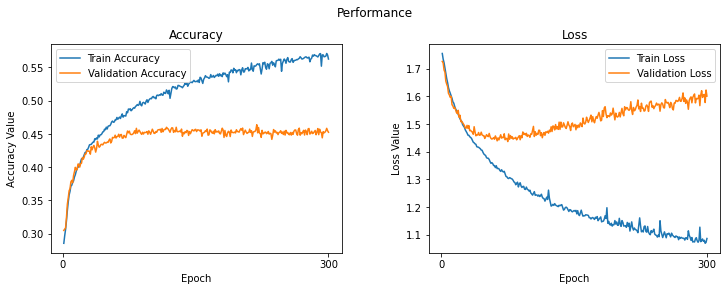

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,Epoch+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, Epoch+1, Epoch))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, Epoch+1, Epoch))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

[[  10    4   36  112  213   10  105    0]
 [   3   13   36  116  263   10   86    0]
 [   4    9  560  759  136   21  392    2]
 [   4    9  394 1634  221   29  699    1]
 [  62   62  119  375  509   35  308    0]
 [   2    6   51  210  146   84  158    0]
 [   3    4  160  518  234   45 2312    8]
 [   0    0    1    3    3    0   11    3]]
              precision    recall  f1-score   support

           0       0.11      0.02      0.03       490
           1       0.12      0.02      0.04       527
           2       0.41      0.30      0.35      1883
           3       0.44      0.55      0.49      2991
           4       0.30      0.35      0.32      1470
           5       0.36      0.13      0.19       657
           6       0.57      0.70      0.63      3284
           7       0.21      0.14      0.17        21

    accuracy                           0.45     11323
   macro avg       0.32      0.28      0.28     11323
weighted avg       0.42      0.45      0.42     11323



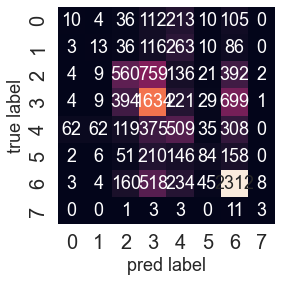

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred,axis=1)
mat = confusion_matrix(y_test,y_pred)

sns.set(font_scale=1.5)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('pred label')
plt.ylabel('true label')

t = ['0','1','2','3','4','5','6','7']
print(mat)
print(classification_report(y_test,y_pred,target_names=t))